<a href="https://colab.research.google.com/github/Shubhamthorat667/react_registration/blob/main/Anamoly_Multiclass_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

**Importing Datasets**

In [2]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('/content/UNSW_NB15.csv')

In [3]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("/content/UNSW_NB15.csv")

# Drop irrelevant columns if needed
data = data.drop(columns=['id'])

# Encode categorical features
categorical_features = ['proto', 'service', 'state', 'attack_cat']
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

# Split data into features and target
X = data.drop(columns=['attack_cat'])
y = data['attack_cat']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=len(data['attack_cat'].unique()), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Generate predictions
y_pred = model.predict_classes(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Epoch 1/10
3946/3946 [==============================] - 91s 22ms/step - loss: 0.6252 - accuracy: 0.7769 - val_loss: 0.5180 - val_accuracy: 0.8129
Epoch 2/10
3946/3946 [==============================] - 84s 21ms/step - loss: 0.5090 - accuracy: 0.8150 - val_loss: 0.5273 - val_accuracy: 0.8081
Epoch 3/10
3946/3946 [==============================] - 86s 22ms/step - loss: 0.4726 - accuracy: 0.8288 - val_loss: 0.4337 - val_accuracy: 0.8397
Epoch 4/10
3946/3946 [==============================] - 87s 22ms/step - loss: 0.4568 - accuracy: 0.8334 - val_loss: 0.4132 - val_accuracy: 0.8460
Epoch 5/10
3946/3946 [==============================] - 85s 22ms/step - loss: 0.4215 - accuracy: 0.8448 - val_loss: 0.4805 - val_accuracy: 0.8201
Epoch 6/10
3946/3946 [==============================] - 84s 21ms/step - loss: 0.4173 - accuracy: 0.8463 - val_loss: 0.3942 - val_accuracy: 0.8514
Epoch 7/10
3946/3946 [==============================] - 82s 21ms/step - loss: 0.4054 - accuracy: 0.8500 - val_loss: 0.3878 -

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [6]:
data['service'].replace('-',np.nan,inplace=True)

In [7]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [8]:
data.shape

(175341, 45)

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(81173, 45)

In [11]:
data['attack_cat'].value_counts()

attack_cat
Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: count, dtype: int64

In [12]:
data['state'].value_counts()

state
INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: count, dtype: int64

In [13]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [14]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/UNSW_NB15_features.csv')

In [15]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [16]:
features['Type '] = features['Type '].str.lower()

In [17]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [18]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [19]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [20]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [21]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [23]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


**Data Visualization**

**Binary Classification**

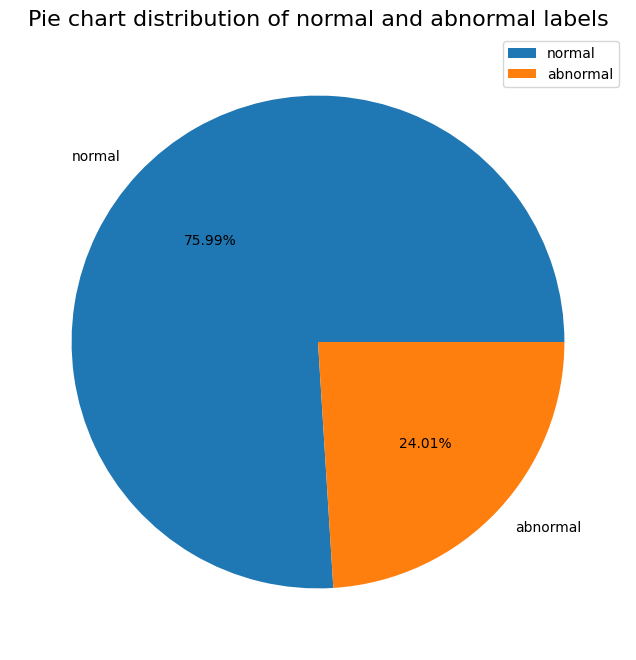

In [25]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

**Multi-class Classification**

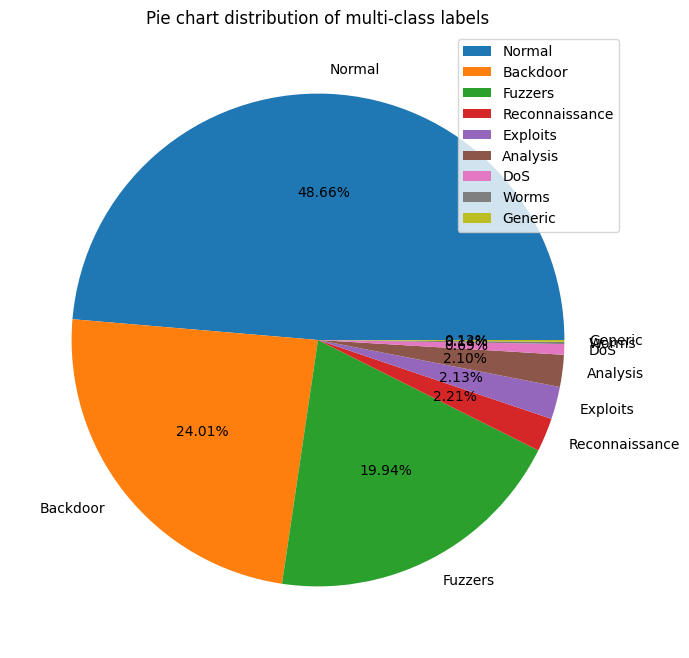

In [27]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

**One hot encoding**

In [28]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [29]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [30]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [31]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [32]:
data.shape

(81173, 45)

In [33]:
data = pd.concat([data, data_cat],axis=1)

In [34]:
data.shape

(81173, 64)

In [35]:
data.drop(columns=cat_col,inplace=True)

In [36]:
data.shape

(81173, 61)

**Data Normalization**

In [37]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [38]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [39]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,False,True,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,False,True,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [40]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [41]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,False,True,False,False,False,False,True,False,False,False
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,False,True,False,False,False,False,True,False,False
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


**Label Encoding**

1.Binary Labels


In [42]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [43]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [44]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [45]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [46]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

**2.Multi-class Labels**

In [48]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [49]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [50]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [51]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [52]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

**Correlation between features of dataset**

In [53]:
num_col.append('label')

**Correlation Matrix for Binary Labels**

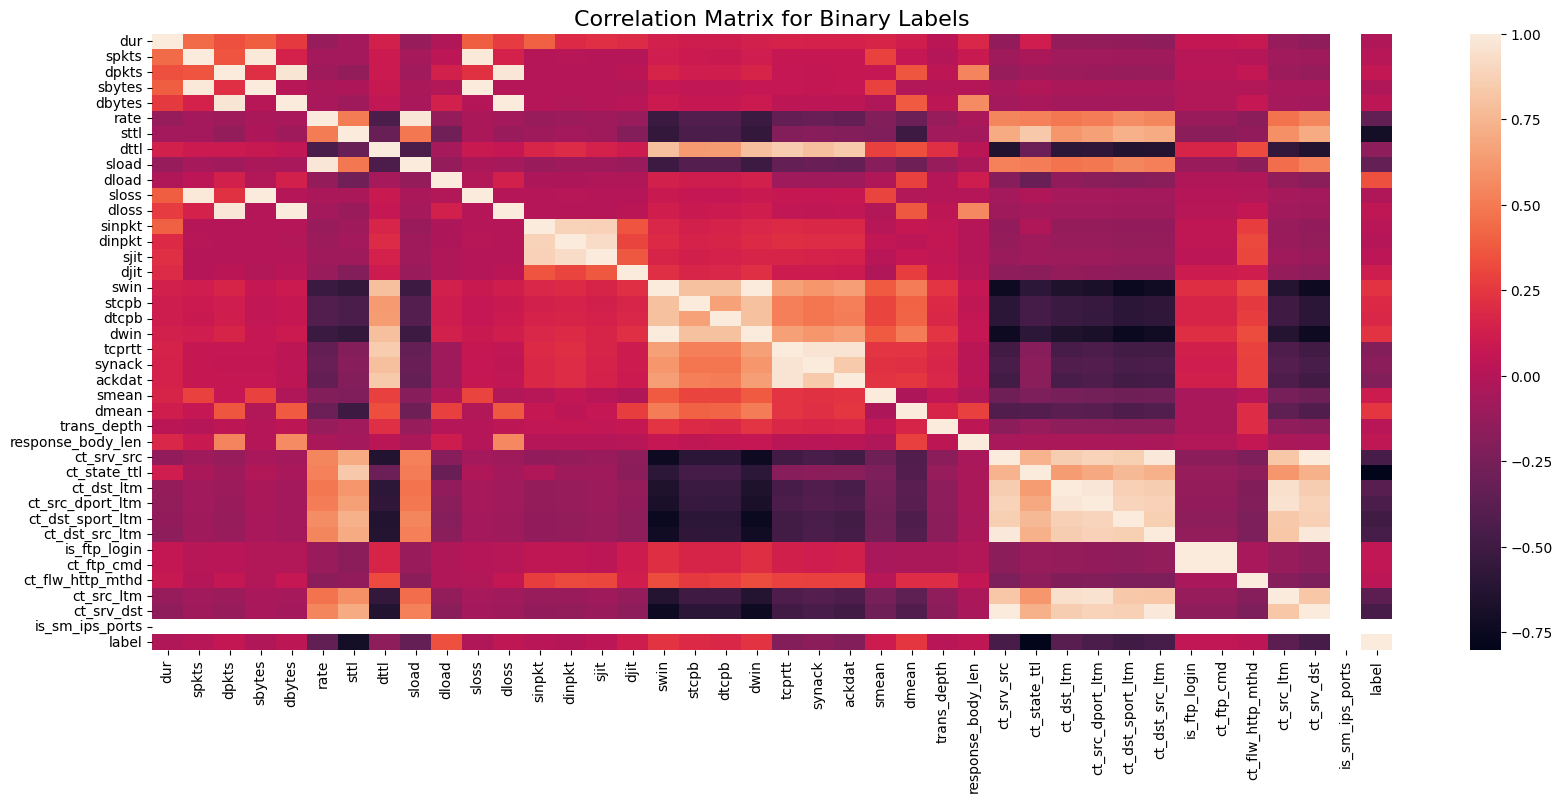

In [55]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

**Correlation Matrix for Multi-class Labels**

In [56]:
num_col = list(multi_data.select_dtypes(include='number').columns)

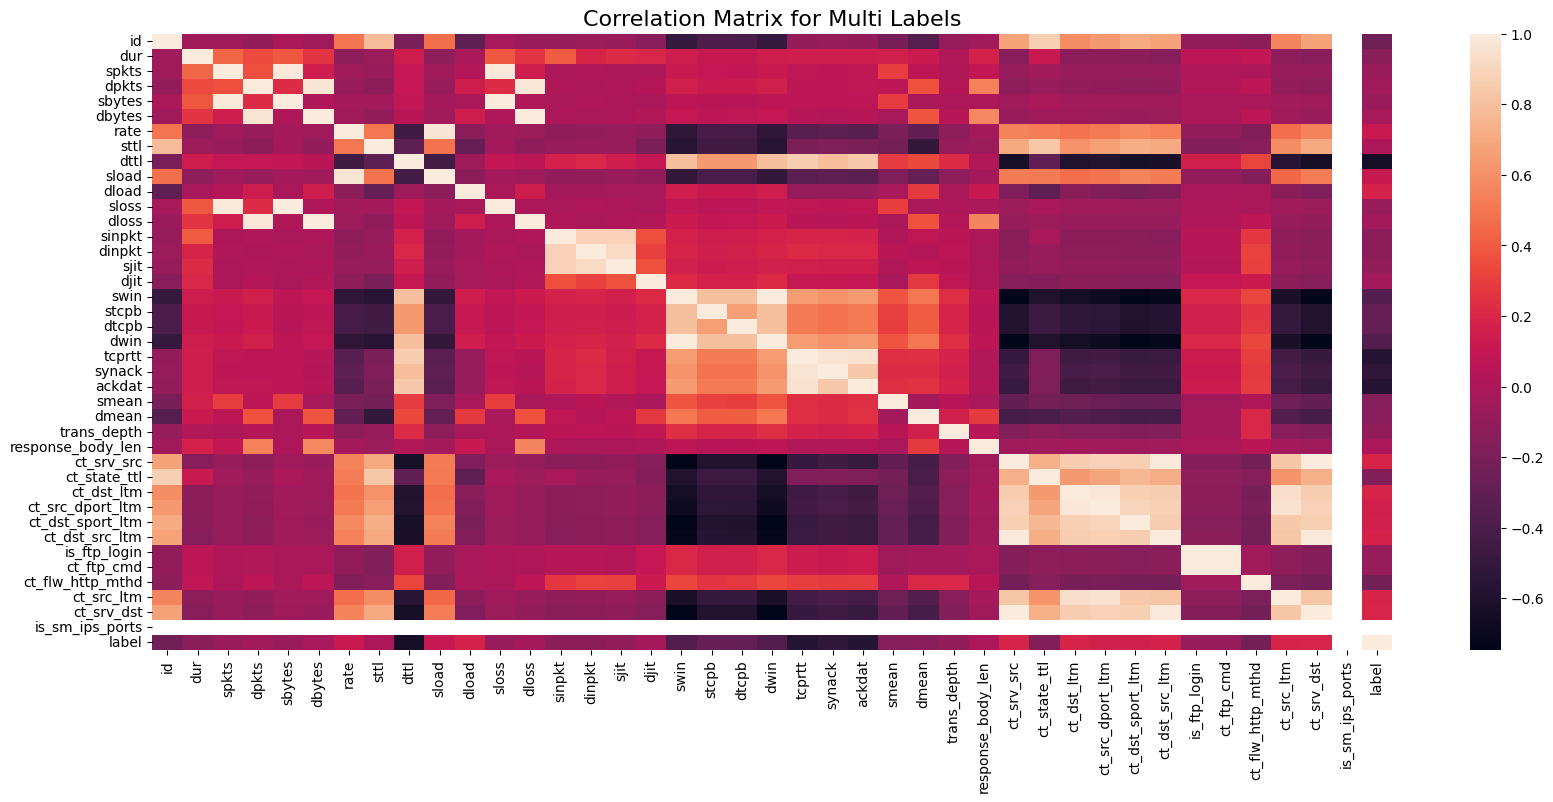

In [58]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

**Feature Selection**

**Binary Labels**

In [59]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [60]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [61]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0


**Saving Prepared Dataset to Disk**

In [62]:
# bin_data.to_csv('./datasets/bin_data.csv')

**Multi-class Labels**

In [177]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

swin      0.364393
dwin      0.364393
synack    0.524027
ackdat    0.570098
tcprtt    0.570205
dttl      0.646589
label     1.000000
Name: label, dtype: float64

In [178]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label'], dtype='object')

In [180]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()
multi_data

,dttl,swin,dwin,tcprtt,synack,ackdat,label
3,0.992126,1.0,1.0,0.000000,0.000000,0.000000,6
11,0.992126,1.0,1.0,0.087972,0.103000,0.054975,6
15,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6
17,0.992126,1.0,1.0,0.080709,0.115373,0.042914,6
21,0.992126,1.0,1.0,0.103597,0.107399,0.069747,6
...,...,...,...,...,...,...,...
175335,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5
175336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5
175338,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5
175339,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5


**Saving Prepared Dataset to Disk**

In [66]:
# multi_data.to_csv('./datasets/multi_data.csv')

**BINARY CLASSIFICATION**

**Data Splitting**

In [67]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

**Linear Regression**

In [71]:
lr_bin = LinearRegression()
lr_bin.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = lr_bin.predict(X_test)

In [73]:
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

In [74]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.021373575608253773
Mean Squared Error -  0.021373575608253773
Root Mean Squared Error -  0.1461970437739894
R2 Score -  88.51642180721258
Accuracy -  97.86264243917462


In [75]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)

In [76]:
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.92      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



**Real and Predicted Data**

In [78]:
lr_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# lr_bin_df.to_csv('./predictions/lr_real_pred_bin.csv')
lr_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


**Plot between Real and Predicted Data**

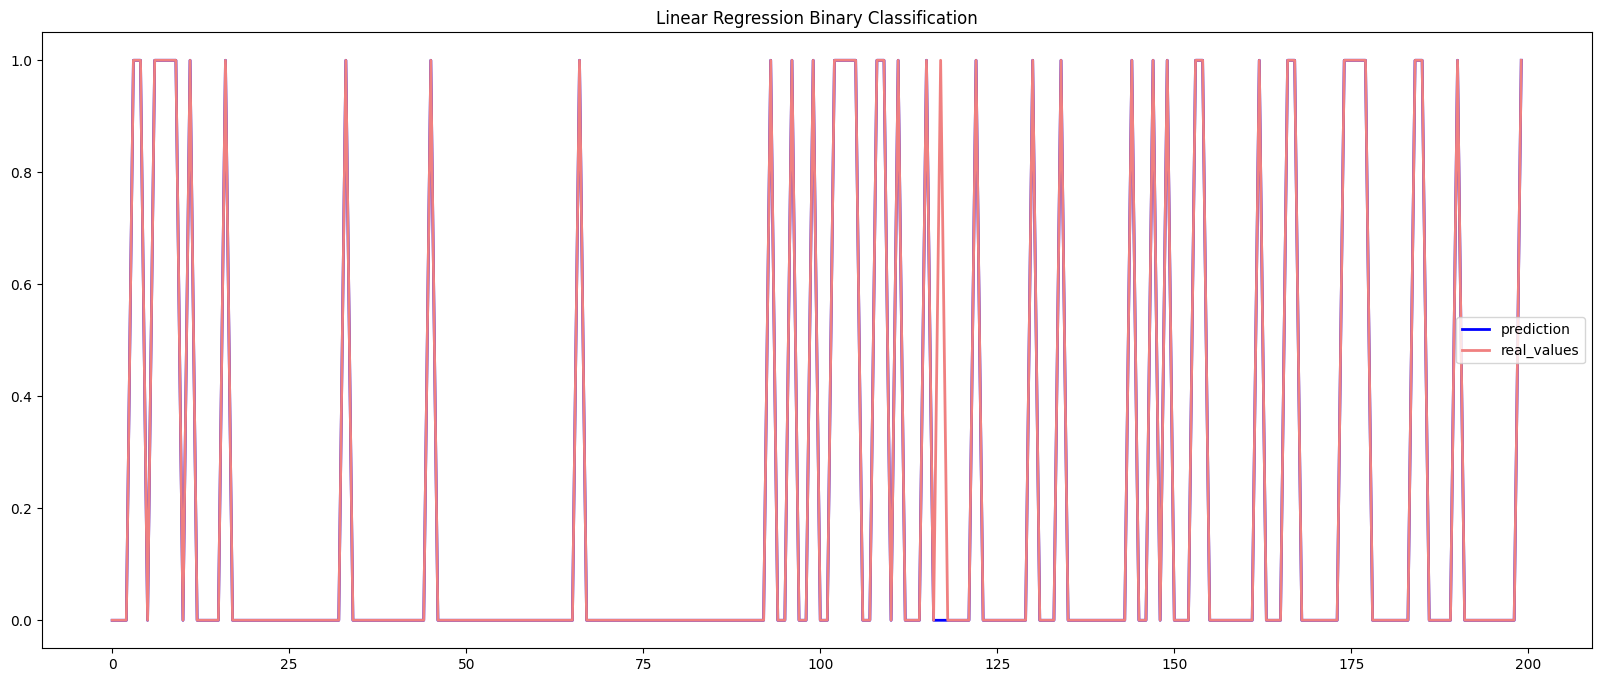

In [80]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression Binary Classification")
# plt.savefig('plots/lr_real_pred_bin.png')
plt.show()

**Saving Trained Model to Disk**

In [82]:
# pkl_filename = "./models/linear_regressor_binary.pkl"
# if (not path.isfile(pkl_filename)):
#   # saving the trained model to disk
#   with open(pkl_filename, 'wb') as file:
#     pickle.dump(lr_bin, file)
#   print("Saved model to disk")
# else:
#   print("Previous Model exists on the disk! Please Remove")

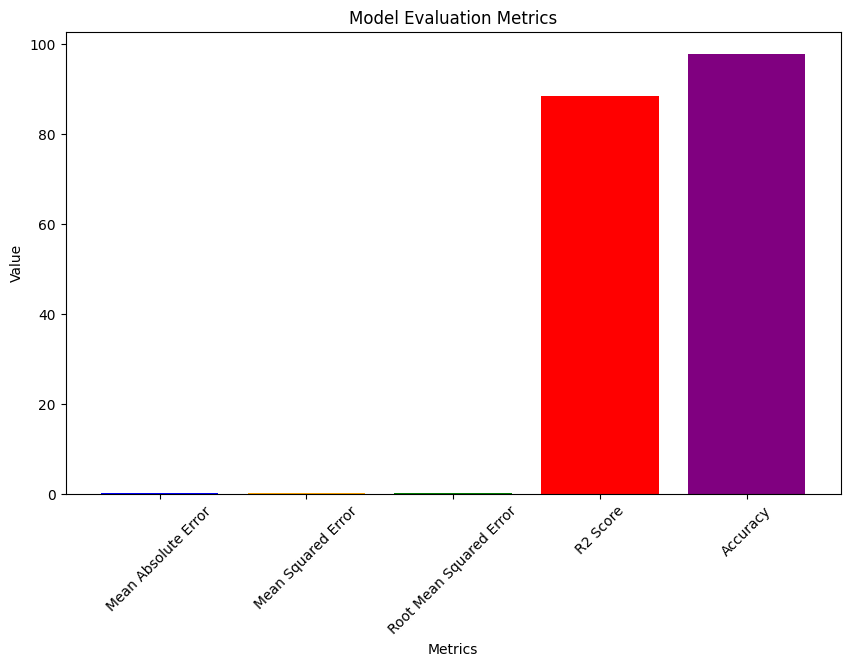

Classification Report:
              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.92      0.95      3909

    accuracy                           0.98     16235
   macro avg       0.98      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming bin_data, X, and Y are already defined

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Training the model
lr_bin = LinearRegression()
lr_bin.fit(X_train, y_train)

# Predictions
y_pred = lr_bin.predict(X_test)
round = lambda x: 1 if x > 0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)

# Evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

# Classification report
cls_report = classification_report(y_true=y_test, y_pred=y_pred, target_names=le1.classes_)

# Visualization
metrics_dict = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R2 Score': r2,
    'Accuracy': accuracy
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Displaying classification report
print("Classification Report:")
print(cls_report)


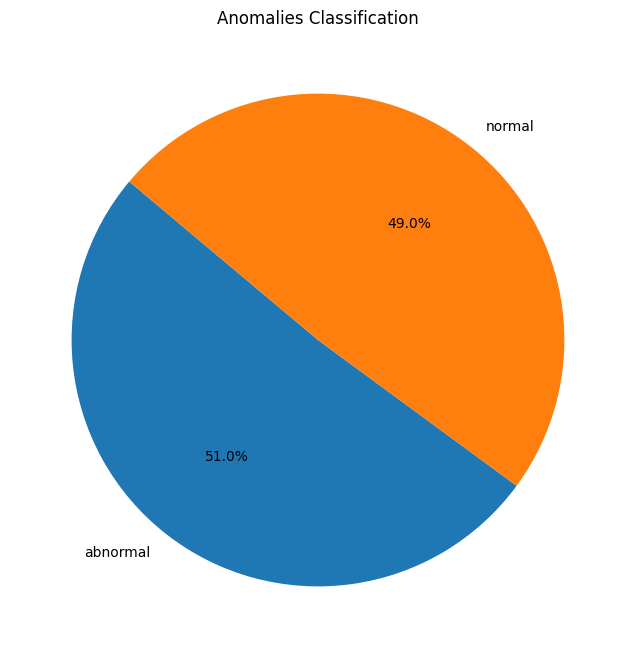

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming cls_report is already defined

# Extracting values from the classification report
lines = cls_report.split('\n')
data = [line.split() for line in lines[2:4]]
classes = [data[i][0] for i in range(2)]
values = [float(data[i][3]) for i in range(2)]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(values, labels=classes, autopct='%1.1f%%', startangle=140)
plt.title('Anomalies Classification')
plt.show()


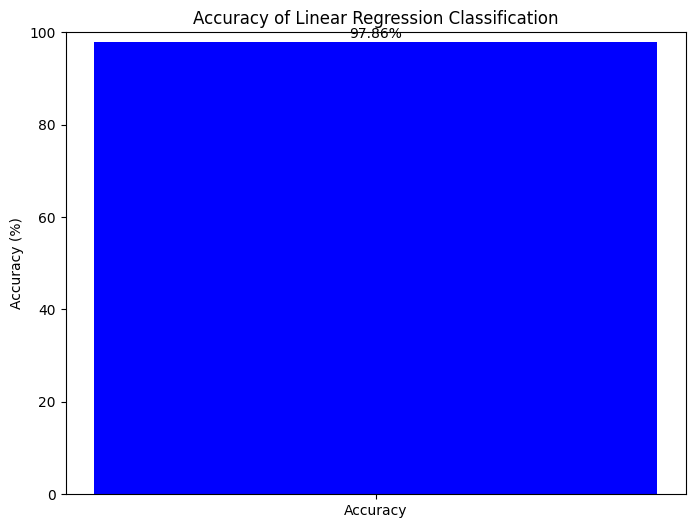

In [88]:
import matplotlib.pyplot as plt

# Assuming accuracy_score is already defined
accuracy = accuracy_score(y_test, y_pred) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy], color=['blue'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Linear Regression Classification')
plt.ylim(0, 100)

# Adding percentage text on top of the bar
for i, v in enumerate([accuracy]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', color='black')

plt.show()


In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Assuming bin_data is your dataset

# Data Splitting
X = bin_data.drop(columns=['label'], axis=1)
Y = bin_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Autoencoder Model
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Training
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Reconstruction
X_train_recon = autoencoder.predict(X_train)
X_test_recon = autoencoder.predict(X_test)

# Reconstruction Error
mse_train = np.mean(np.power(X_train - X_train_recon, 2), axis=1)
mse_test = np.mean(np.power(X_test - X_test_recon, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.mean(mse_train) + 2 * np.std(mse_train)

# Classify anomalies
y_pred_train = (mse_train > threshold).astype(int)
y_pred_test = (mse_test > threshold).astype(int)

# Accuracy and Classification Report
accuracy_train = accuracy_score(y_train, y_pred_train) * 100
accuracy_test = accuracy_score(y_test, y_pred_test) * 100

cls_report = classification_report(y_true=y_test, y_pred=y_pred_test, target_names=['normal', 'abnormal'])

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Classification Report:\n", cls_report)


Epoch 1/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0138 - val_loss: 0.0011
Epoch 2/50
2030/2030 [==============================] - 5s 2ms/step - loss: 7.2974e-04 - val_loss: 4.2467e-04
Epoch 3/50
2030/2030 [==============================] - 4s 2ms/step - loss: 3.0508e-04 - val_loss: 2.3800e-04
Epoch 4/50
2030/2030 [==============================] - 4s 2ms/step - loss: 1.9709e-04 - val_loss: 1.6925e-04
Epoch 5/50
2030/2030 [==============================] - 5s 2ms/step - loss: 1.4663e-04 - val_loss: 1.2997e-04
Epoch 6/50
2030/2030 [==============================] - 4s 2ms/step - loss: 1.2113e-04 - val_loss: 1.1209e-04
Epoch 7/50
2030/2030 [==============================] - 4s 2ms/step - loss: 1.0430e-04 - val_loss: 9.4094e-05
Epoch 8/50
2030/2030 [==============================] - 4s 2ms/step - loss: 8.8335e-05 - val_loss: 8.3626e-05
Epoch 9/50
2030/2030 [==============================] - 4s 2ms/step - loss: 7.9441e-05 - val_loss: 7.4375e-05
Epoch 10/50
2030/2

**RNN+LSTM Dense layer model**

In [92]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X_train, X_test, y_train, y_test are already defined

# Reshape the input data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the RNN model
model = Sequential([
    LSTM(units=64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=25, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test)

print("Test Accuracy:", test_accuracy)

# Generate predictions
# Generate raw predictions
y_pred_proba = model.predict(X_test_rnn)

# Apply threshold to get binary predictions
y_pred_rnn = (y_pred_proba > 0.5).astype(int)


# Classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred_rnn))


Epoch 1/25
1827/1827 [==============================] - 9s 4ms/step - loss: 0.1808 - accuracy: 0.9439 - val_loss: 0.0818 - val_accuracy: 0.9783
Epoch 2/25
1827/1827 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9768 - val_loss: 0.0672 - val_accuracy: 0.9794
Epoch 3/25
1827/1827 [==============================] - 7s 4ms/step - loss: 0.0694 - accuracy: 0.9773 - val_loss: 0.0620 - val_accuracy: 0.9791
Epoch 4/25
1827/1827 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 0.0602 - val_accuracy: 0.9791
Epoch 5/25
1827/1827 [==============================] - 7s 4ms/step - loss: 0.0641 - accuracy: 0.9785 - val_loss: 0.0590 - val_accuracy: 0.9798
Epoch 6/25
1827/1827 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9789 - val_loss: 0.0586 - val_accuracy: 0.9800
Epoch 7/25
1827/1827 [==============================] - 6s 4ms/step - loss: 0.0614 - accuracy: 0.9792 - val_loss: 0.0576 - val_accuracy:

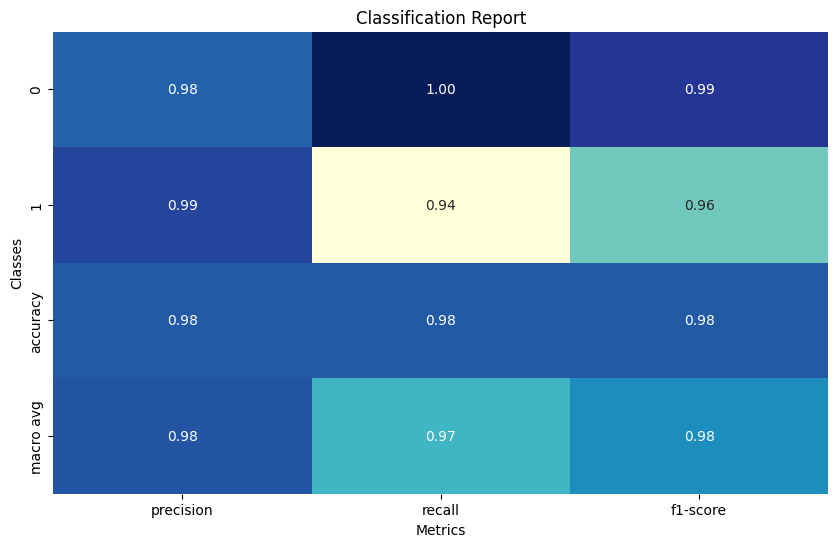

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Replace y_test and y_pred_rnn with your actual test labels and predicted labels
y_true = y_test
y_pred = y_pred_rnn

# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


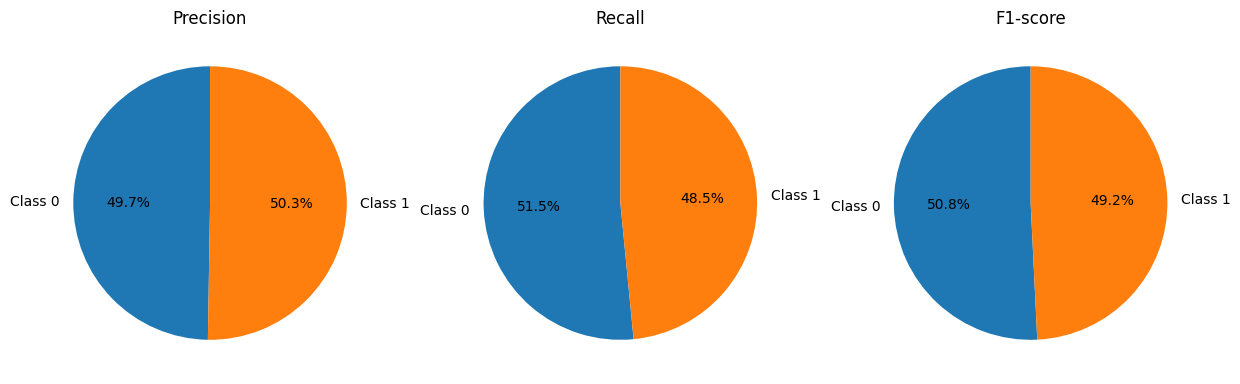

In [96]:
import matplotlib.pyplot as plt

# Precision, recall, and f1-score values for each class
precision = [0.98, 0.99]  # Precision for class 0 and class 1
recall = [1.00, 0.94]  # Recall for class 0 and class 1
f1_score = [0.99, 0.96]  # F1-score for class 0 and class 1
labels = ['Class 0', 'Class 1']  # Labels for the classes

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot precision
axs[0].pie(precision, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Precision')

# Plot recall
axs[1].pie(recall, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Recall')

# Plot f1-score
axs[2].pie(f1_score, labels=labels, autopct='%1.1f%%', startangle=90)
axs[2].set_title('F1-score')

plt.show()


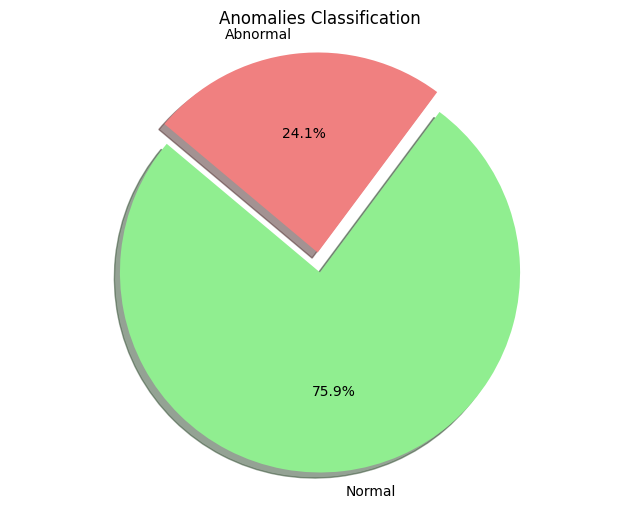

In [97]:
import matplotlib.pyplot as plt

# Anomalies classification
labels = ['Normal', 'Abnormal']
sizes = [12326, 3909]  # Replace with your actual counts
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Anomalies Classification')
plt.show()


**Encoder - Decoder with ML classifier **

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.svm import SVC  # You can use any classifier here

# Define parameters
input_dim = X_train.shape[1]  # Dimensionality of the input data
encoding_dim = 64  # Dimensionality of the encoded representation
epochs = 50  # Number of training epochs
batch_size = 32  # Batch size for training

# Define the encoder
encoder_input = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(encoder_input)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)

encoder = Model(encoder_input, encoder_output)

# Define the decoder
decoder_input = Input(shape=(encoding_dim,))
decoded = Dense(input_dim, activation='sigmoid')(decoder_input)

decoder = Model(decoder_input, decoded)

# Define the autoencoder
autoencoder_input = Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_input, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test))

# Evaluate the autoencoder
autoencoder.evaluate(X_test, X_test)

# Use the trained autoencoder for anomaly detection
encoded_X_train = encoder.predict(X_train)
encoded_X_test = encoder.predict(X_test)

# Define and train a classifier on the encoded data
classifier = SVC()  # You can use any classifier here
classifier.fit(encoded_X_train, y_train)
accuracy = classifier.score(encoded_X_test, y_test)

print("Test Accuracy:", accuracy)


Epoch 1/50
2030/2030 [==============================] - 10s 4ms/step - loss: 0.2824 - val_loss: 0.2652
Epoch 2/50
2030/2030 [==============================] - 5s 3ms/step - loss: 0.2657 - val_loss: 0.2638
Epoch 3/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.2648 - val_loss: 0.2632
Epoch 4/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.2643 - val_loss: 0.2628
Epoch 5/50
2030/2030 [==============================] - 5s 3ms/step - loss: 0.2640 - val_loss: 0.2626
Epoch 6/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.2638 - val_loss: 0.2624
Epoch 7/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.2637 - val_loss: 0.2623
Epoch 8/50
2030/2030 [==============================] - 5s 3ms/step - loss: 0.2636 - val_loss: 0.2622
Epoch 9/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.2635 - val_loss: 0.2622
Epoch 10/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.26

In [107]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the autoencoder model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(X_train.shape[1])
])

# Compile the autoencoder
model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
model.fit(X_train, X_train,
          epochs=50,
          batch_size=32,
          shuffle=True,
          validation_data=(X_test, X_test))

# Generate encoded representations of the input data
encoded_X_train = model.predict(X_train)
encoded_X_test = model.predict(X_test)

# Define and train a Random Forest classifier on the encoded data
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
accuracy = classifier.score(encoded_X_test, y_test)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred = classifier.predict(encoded_X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50
2030/2030 [==============================] - 8s 3ms/step - loss: 0.0069 - val_loss: 9.8089e-04
Epoch 2/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0029 - val_loss: 7.8475e-04
Epoch 3/50
2030/2030 [==============================] - 6s 3ms/step - loss: 0.0025 - val_loss: 6.6487e-04
Epoch 4/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0024 - val_loss: 6.1052e-04
Epoch 5/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0023 - val_loss: 7.1871e-04
Epoch 6/50
2030/2030 [==============================] - 6s 3ms/step - loss: 0.0022 - val_loss: 5.5990e-04
Epoch 7/50
2030/2030 [==============================] - 4s 2ms/step - loss: 0.0022 - val_loss: 5.0225e-04
Epoch 8/50
2030/2030 [==============================] - 5s 2ms/step - loss: 0.0021 - val_loss: 5.2594e-04
Epoch 9/50
2030/2030 [==============================] - 5s 2ms/step - loss: 0.0021 - val_loss: 5.5987e-04
Epoch 10/50
2030/2030 [=======================

In [108]:
from sklearn.svm import SVC

# Define the SVM classifier
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the SVM classifier on the encoded data
svm_classifier.fit(encoded_X_train, y_train)

# Evaluate the SVM classifier
svm_test_accuracy = svm_classifier.score(encoded_X_test, y_test)

print("SVM Test Accuracy:", svm_test_accuracy)


SVM Test Accuracy: 0.9793039728980597


In [109]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_rf = rf_classifier.score(encoded_X_test, y_test)
print("Random Forest Test Accuracy:", test_accuracy_rf)


Random Forest Test Accuracy: 0.9824453341546042


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_gb = gb_classifier.score(encoded_X_test, y_test)
print("Gradient Boosting Test Accuracy:", test_accuracy_gb)


Gradient Boosting Test Accuracy: 0.981706190329535


In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_knn = knn_classifier.score(encoded_X_test, y_test)
print("k-NN Test Accuracy:", test_accuracy_knn)


k-NN Test Accuracy: 0.9812134277794887


In [112]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_dt = dt_classifier.score(encoded_X_test, y_test)
print("Decision Tree Test Accuracy:", test_accuracy_dt)


Decision Tree Test Accuracy: 0.980597474591931


In [113]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
adaboost_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_adaboost = adaboost_classifier.score(encoded_X_test, y_test)
print("AdaBoost Test Accuracy:", test_accuracy_adaboost)


AdaBoost Test Accuracy: 0.9824453341546042


In [114]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_xgb = xgb_classifier.score(encoded_X_test, y_test)
print("XGBoost Test Accuracy:", test_accuracy_xgb)


XGBoost Test Accuracy: 0.9833076686171851


In [115]:
import lightgbm as lgb

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the classifier
lgb_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
test_accuracy_lgb = lgb_classifier.score(encoded_X_test, y_test)
print("LightGBM Test Accuracy:", test_accuracy_lgb)


[LightGBM] [Info] Number of positive: 15579, number of negative: 49359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 64938, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239906 -> initscore=-1.153196
[LightGBM] [Info] Start training from score -1.153196
LightGBM Test Accuracy: 0.9839236218047428


In [116]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier
gb_classifier.fit(encoded_X_train, y_train)

# Evaluate the classifier
gb_accuracy = gb_classifier.score(encoded_X_test, y_test)
print("Gradient Boosting Test Accuracy:", gb_accuracy)


Gradient Boosting Test Accuracy: 0.981706190329535


In [117]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest classifier
isolation_forest = IsolationForest()

# Train the classifier
isolation_forest.fit(encoded_X_train)

# Predict anomalies
y_pred_anomalies = isolation_forest.predict(encoded_X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
y_pred_labels = np.where(y_pred_anomalies == 1, 0, 1)

# Calculate accuracy
isolation_forest_accuracy = accuracy_score(y_test, y_pred_labels)
print("Isolation Forest Test Accuracy:", isolation_forest_accuracy)


Isolation Forest Test Accuracy: 0.625130890052356


In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define the AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_ada = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Classifier Test Accuracy:", accuracy_ada)


AdaBoost Classifier Test Accuracy: 0.983061287342162


In [119]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the model
test_accuracy_nb = nb_classifier.score(X_test, y_test)
print("Naive Bayes Test Accuracy:", test_accuracy_nb)


Naive Bayes Test Accuracy: 0.7454265475823837


In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Evaluate the model
test_accuracy_knn = knn_classifier.score(X_test, y_test)
print("K-Nearest Neighbors Test Accuracy:", test_accuracy_knn)


K-Nearest Neighbors Test Accuracy: 0.983061287342162


In [121]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate the model
test_accuracy_dt = dt_classifier.score(X_test, y_test)
print("Decision Tree Test Accuracy:", test_accuracy_dt)


Decision Tree Test Accuracy: 0.9809670465044656


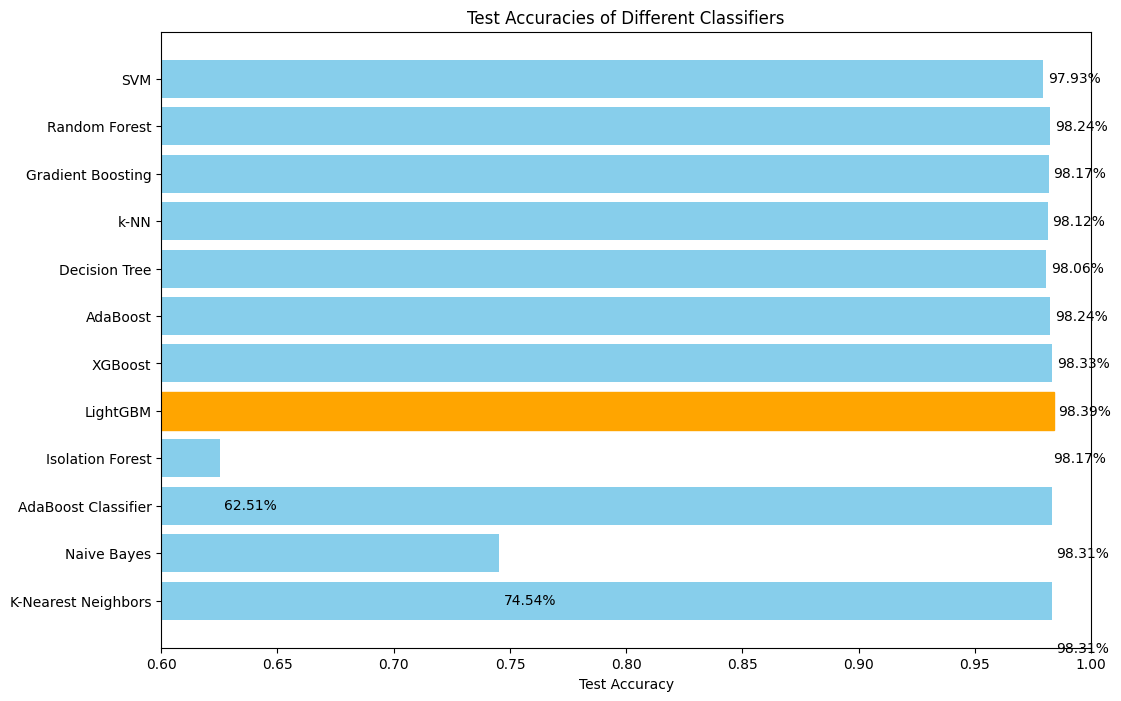

In [124]:
import matplotlib.pyplot as plt

# Test accuracies and classifier names
test_accuracies = [0.9793039728980597, 0.9824453341546042, 0.981706190329535, 0.9812134277794887,
                   0.980597474591931, 0.9824453341546042, 0.9833076686171851, 0.9839236218047428,
                   0.981706190329535, 0.625130890052356, 0.983061287342162, 0.7454265475823837,
                   0.983061287342162]
classifier_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'k-NN', 'Decision Tree',
                    'AdaBoost', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'Isolation Forest',
                    'AdaBoost Classifier', 'Naive Bayes', 'K-Nearest Neighbors']

# Calculate percentages
total_tests = len(test_accuracies)
percentages = [(accuracy * 100) for accuracy in test_accuracies]

# Find the index of the classifier with the highest accuracy
max_accuracy_index = test_accuracies.index(max(test_accuracies))

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(classifier_names, test_accuracies, color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Test Accuracies of Different Classifiers')
plt.xlim(0.6, 1)  # Limit the x-axis for better visualization
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i in range(len(classifier_names)):
    plt.text(test_accuracies[i] + 0.002, i, f'{percentages[i]:.2f}%', va='center', fontsize=10)
bars[max_accuracy_index].set_color('orange')  # Highlight the classifier with the highest accuracy
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top
plt.show()


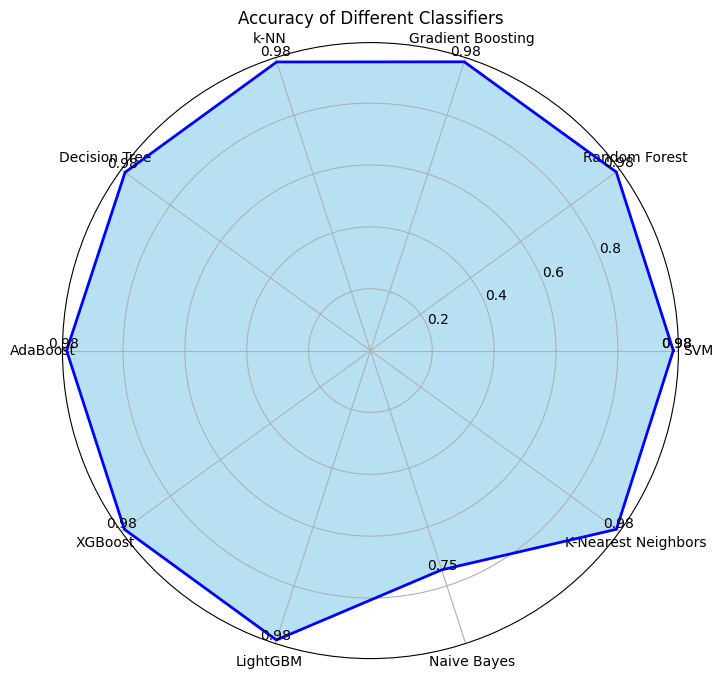

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding accuracies
classifiers = ['SVM', 'Random Forest', 'Gradient Boosting', 'k-NN', 'Decision Tree', 'AdaBoost', 'XGBoost', 'LightGBM', 'Naive Bayes', 'K-Nearest Neighbors']
accuracies = [0.9793039728980597, 0.9824453341546042, 0.981706190329535, 0.9812134277794887, 0.980597474591931, 0.9824453341546042, 0.9833076686171851, 0.9839236218047428, 0.7454265475823837, 0.983061287342162]

# Number of classifiers
num_classifiers = len(classifiers)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_classifiers, endpoint=False).tolist()

# The radar chart is circular, so we need to "complete the loop" by adding the start to the end
accuracies += accuracies[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, accuracies, color='skyblue', alpha=0.6)
ax.plot(angles, accuracies, color='blue', linewidth=2)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(classifiers)

# Display the accuracy values on the chart
for angle, accuracy in zip(angles, accuracies):
    ax.text(angle, accuracy + 0.01, '{:.2f}'.format(accuracy), ha='center', va='bottom')

# Display the radar chart
plt.title('Accuracy of Different Classifiers')
plt.show()


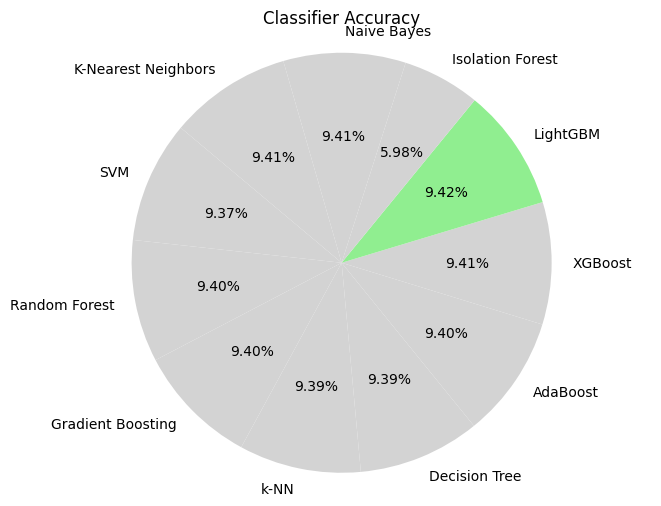

In [130]:
import matplotlib.pyplot as plt

# Accuracy scores for different classifiers
classifiers = ['SVM', 'Random Forest', 'Gradient Boosting', 'k-NN', 'Decision Tree', 'AdaBoost', 'XGBoost', 'LightGBM', 'Isolation Forest', 'Naive Bayes', 'K-Nearest Neighbors']
accuracies = [0.9793039728980597, 0.9824453341546042, 0.981706190329535, 0.9812134277794887, 0.980597474591931, 0.9824453341546042, 0.9833076686171851, 0.9839236218047428, 0.625130890052356, 0.983061287342162, 0.983061287342162]

# Find the index of the classifier with the highest accuracy
max_accuracy_index = accuracies.index(max(accuracies))

# Highlight the classifier with the highest accuracy
colors = ['lightgrey'] * len(classifiers)
colors[max_accuracy_index] = 'lightgreen'

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(accuracies, labels=classifiers, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title('Classifier Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart with highlighted classifier
plt.show()



**Multiclass Classification**

**Data Splitting**

In [131]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

**Linear Regression**

In [134]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = lr_multi.predict(X_test)

In [136]:
for i in range(len(y_pred)):
  y_pred[i] = int(round(y_pred[i]))

In [137]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  3.772092641261498
Mean Squared Error -  15.610873850197109
Root Mean Squared Error -  3.951059838853002
R2 Score -  0.006960049706483673
Accuracy -  0.1314060446780552


In [138]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       166
      Backdoor       0.00      1.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.00      0.00      0.00      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.00      0.00      0.00     11839
        Normal       0.00      0.00      0.00      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.00     24352
     macro avg       0.00      0.11      0.00     24352
  weighted avg       0.00      0.00      0.00     24352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
logr_multi = LogisticRegression(random_state=123, max_iter=5000,solver='newton-cg',multi_class='multinomial')
logr_multi.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=123,
                   solver='newton-cg')

In [140]:
y_pred = logr_multi.predict(X_test)

In [141]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.23607917214191854
Mean Squared Error -  0.7001888961892248
Root Mean Squared Error -  0.8367729059841892
R2 Score -  53.88437482944739
Accuracy -  89.81192509855454


In [142]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.68      0.99      0.81      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.98      0.99      0.99     11839
        Normal       1.00      0.91      0.95      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.90     24352
     macro avg       0.30      0.32      0.30     24352
  weighted avg       0.86      0.90      0.87     24352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming le2 is the LabelEncoder object for encoding class labels

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)

# Define and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=100)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le2.classes_))


Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.68      0.99      0.81      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.98      0.99      0.99     11839
        Normal       1.00      0.91      0.95      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.90     24352
     macro avg       0.30      0.32      0.30     24352
  weighted avg       0.86      0.90      0.87     24352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train the SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=100)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=le2.classes_)
print("Classification Report:\n", report)


Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       166
      Backdoor       0.00      0.00      0.00        32
           DoS       0.00      0.00      0.00       521
      Exploits       0.68      0.99      0.81      4900
       Fuzzers       0.00      0.00      0.00       508
       Generic       0.98      0.99      0.99     11839
        Normal       1.00      0.91      0.95      5855
Reconnaissance       0.00      0.00      0.00       502
         Worms       0.00      0.00      0.00        29

      accuracy                           0.90     24352
     macro avg       0.30      0.32      0.30     24352
  weighted avg       0.86      0.90      0.87     24352



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
